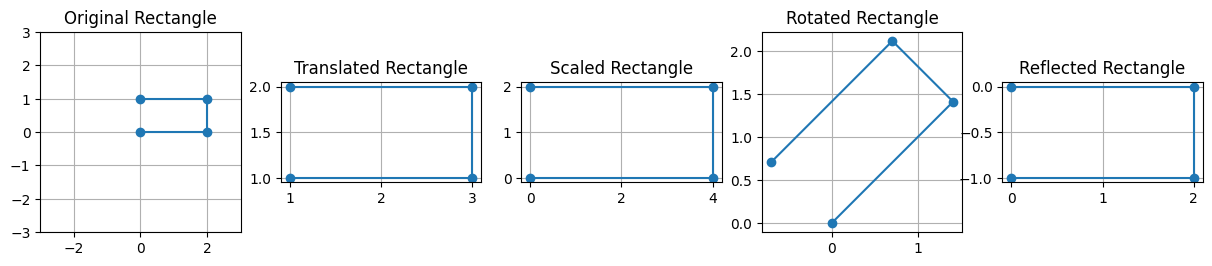

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function for translation
def translate(points, tx, ty):
    transformation_matrix = np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1]])
    new_points = []
    for point in points:
        point_homogeneous = np.array([point[0], point[1], 1])  # Convert to homogeneous coordinates
        new_point = np.dot(transformation_matrix, point_homogeneous)
        new_points.append(new_point[:2])
    return new_points

# Function for scaling
def scale(points, sx, sy):
    transformation_matrix = np.array([[sx, 0, 0], [0, sy, 0], [0, 0, 1]])
    new_points = []
    for point in points:
        point_homogeneous = np.array([point[0], point[1], 1])  # Convert to homogeneous coordinates
        new_point = np.dot(transformation_matrix, point_homogeneous)
        new_points.append(new_point[:2])
    return new_points

# Function for rotation
def rotate(points, angle_deg):
    angle_rad = np.radians(angle_deg)
    transformation_matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad), 0],
                                      [np.sin(angle_rad), np.cos(angle_rad), 0],
                                      [0, 0, 1]])
    new_points = []
    for point in points:
        point_homogeneous = np.array([point[0], point[1], 1])  # Convert to homogeneous coordinates
        new_point = np.dot(transformation_matrix, point_homogeneous)
        new_points.append(new_point[:2])
    return new_points

# Function for reflection (x-axis)
def reflect_x(points):
    transformation_matrix = np.array([[1, 0, 0], [0, -1, 0], [0, 0, 1]])
    new_points = []
    for point in points:
        point_homogeneous = np.array([point[0], point[1], 1])  # Convert to homogeneous coordinates
        new_point = np.dot(transformation_matrix, point_homogeneous)
        new_points.append(new_point[:2])
    return new_points

# Function for shearing (x-axis)
def shear_x(points, sx):
    transformation_matrix = np.array([[1, sx, 0], [0, 1, 0], [0, 0, 1]])
    new_points = []
    for point in points:
        point_homogeneous = np.array([point[0], point[1], 1])  # Convert to homogeneous coordinates
        new_point = np.dot(transformation_matrix, point_homogeneous)
        new_points.append(new_point[:2])
    return new_points

# Example: Apply transformations on a rectangle
rectangle = [(0, 0), (2, 0), (2, 1), (0, 1)]  # A rectangle with corners at (0,0), (2,0), (2,1), (0,1)

# Apply translation
translated_rectangle = translate(rectangle, 1, 1)
# Apply scaling
scaled_rectangle = scale(rectangle, 2, 2)
# Apply rotation
rotated_rectangle = rotate(rectangle, 45)
# Apply reflection
reflected_rectangle = reflect_x(rectangle)
# Apply shearing in x-axis
sheared_rectangle = shear_x(rectangle, 1)

# Plotting the results
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

# Plot original and transformed rectangles
axes[0].plot(*zip(*rectangle), marker='o')
axes[0].set_title("Original Rectangle")
axes[0].set_xlim(-3, 3)
axes[0].set_ylim(-3, 3)

axes[1].plot(*zip(*translated_rectangle), marker='o')
axes[1].set_title("Translated Rectangle")

axes[2].plot(*zip(*scaled_rectangle), marker='o')
axes[2].set_title("Scaled Rectangle")

axes[3].plot(*zip(*rotated_rectangle), marker='o')
axes[3].set_title("Rotated Rectangle")

axes[4].plot(*zip(*reflected_rectangle), marker='o')
axes[4].set_title("Reflected Rectangle")

for ax in axes:
    ax.set_aspect('equal')
    ax.grid(True)

plt.show()


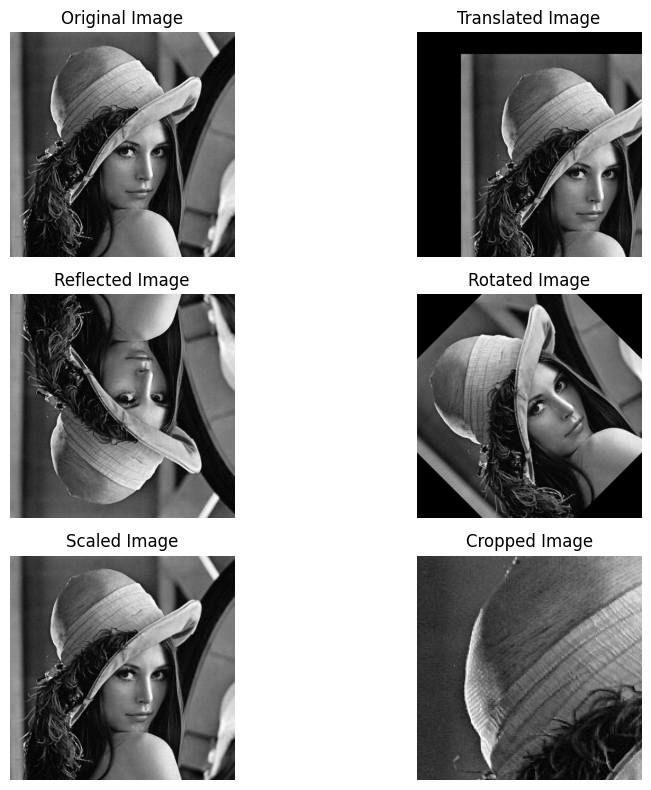

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (make sure you have an image in the directory)
image = cv2.imread('/content/Picture1.jpg')

# Function for translation
def translate_image(image, tx, ty):
    rows, cols = image.shape[:2]
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_image = cv2.warpAffine(image, translation_matrix, (cols, rows))
    return translated_image

# Function for reflection (flip)
def reflect_image(image, axis):
    if axis == 'x':
        return cv2.flip(image, 0)  # Flip around x-axis
    elif axis == 'y':
        return cv2.flip(image, 1)  # Flip around y-axis
    else:
        return image

# Function for rotation
def rotate_image(image, angle):
    rows, cols = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    return rotated_image

# Function for scaling
def scale_image(image, fx, fy):
    return cv2.resize(image, None, fx=fx, fy=fy)

# Function for cropping
def crop_image(image, x, y, w, h):
    return image[y:y+h, x:x+w]

# Function for shearing (x-axis)
def shear_image_x(image, shear_factor):
    rows, cols = image.shape[:2]
    shear_matrix = np.float32([[1, shear_factor, 0], [0, 1, 0]])
    sheared_image = cv2.warpAffine(image, shear_matrix, (cols, rows))
    return sheared_image

# Display original and transformed images
plt.figure(figsize=(10, 8))

# Plot the original image
plt.subplot(3, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# Apply translation
translated = translate_image(image, 100, 50)
plt.subplot(3, 2, 2)
plt.imshow(cv2.cvtColor(translated, cv2.COLOR_BGR2RGB))
plt.title("Translated Image")
plt.axis('off')

# Apply reflection
reflected = reflect_image(image, 'x')
plt.subplot(3, 2, 3)
plt.imshow(cv2.cvtColor(reflected, cv2.COLOR_BGR2RGB))
plt.title("Reflected Image")
plt.axis('off')

# Apply rotation
rotated = rotate_image(image, 45)
plt.subplot(3, 2, 4)
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
plt.title("Rotated Image")
plt.axis('off')

# Apply scaling
scaled = scale_image(image, 0.5, 0.5)
plt.subplot(3, 2, 5)
plt.imshow(cv2.cvtColor(scaled, cv2.COLOR_BGR2RGB))
plt.title("Scaled Image")
plt.axis('off')

# Apply cropping
cropped = crop_image(image, 50, 50, 200, 200)
plt.subplot(3, 2, 6)
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
plt.title("Cropped Image")
plt.axis('off')

plt.tight_layout()
plt.show()
